In [2]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema 
from scipy.interpolate import interp1d 
import operator as op
from decimal import *
# import mpmath as mp
import pickle
from scipy.stats import binom
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [3]:
%run ../cow.py
%run ../optimize_pkg_2.py

In [5]:
# codingscheme = filepath_down = "../data_tables/hs_rs_downlink" 
hsrs_up = "../data_tables/hs_rs_uplink"
shannon_scheme = "../data_tables/shannon_tables"
poly_scheme = "../data_tables/polyanskiy_up"
protocolbit = 4*10**4
target = 10**(-9)
dSNR = 0.01
paddratio = 0.1 # padd = 10**(-10) 
tSNR_range = np.arange(0, 92, 1) 
rSNR1_range = np.arange(-1, 7, 0.01)
start_nodes, end_nodes = 2, 36
user_range = xrange(start_nodes, end_nodes)

# Loudest Talker

In [8]:
%%time
start_SNR = 0
hsrs_lt = loudest_talker(hsrs_up, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print hsrs_lt
print "\n"

shannon_lt = loudest_talker(shannon_scheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print shannon_lt
print "\n"
                            
polyup_lt = loudest_talker(poly_scheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print polyup_lt

[ 47.33  33.68  26.86  22.77  20.07  18.11  16.79  15.69  14.94  14.29
  13.84  13.32  12.95  12.95  12.44  12.36  12.35  12.46  12.11  12.38
  12.11  12.58  12.33  13.12  12.91  12.71  14.01  13.85  13.7   16.24
  16.12  16.03  15.95  15.86]


[ 30.9   18.64  12.72   9.31   7.11   5.63   4.56   3.78   3.18   2.72
   2.36   2.08   1.85   1.67   1.53   1.41   1.32   1.25   1.2    1.15
   1.12   1.11   1.09   1.09   1.09   1.09   1.11   1.13   1.14   1.17
   1.19   1.22   1.24   1.28]


[ 34.49  22.21  16.28  12.86  10.67   9.17   8.1    7.31   6.71   6.25
   5.9    5.62   5.39   5.22   5.08   4.96   4.88   4.81   4.76   4.72
   4.7    4.69   4.69   4.7    4.7    4.74   4.74   4.79   4.84   4.87
   4.93   4.98   5.12   5.08]
CPU times: user 9.25 s, sys: 178 ms, total: 9.43 s
Wall time: 10.1 s


# 2 Fade Gap

In [27]:
testleah = np.array([[1, 2], [3, 4]])
print testleah.shape

(2, 2)


In [36]:
hsrs_fadegap_guess = np.array([[ 35. ,  13.59 , 4.91 , 10.91],
[ 34. ,  13.72 , 4.98 , 10.92],
[ 33. ,  13.84 , 4.98 , 10.92],
[ 32. ,  13.97 , 4.96 , 10.92],
[ 31. ,  14.9 ,  3.99 , 10.93],
[ 30. ,  11.87 , 3.63 , 8.27],
[ 29. ,  12.45 , 2.99 , 8.29],
[ 28. ,  12.74 , 2.99 , 8.31],
[ 27. ,  11.13 , 2.94 , 6.87],
[ 26. ,  11.34 , 2.99 , 6.89],
[ 25. ,  11.57 , 2.98 , 6.91],
[ 24. ,  10.92 , 2.41 , 5.95],
[ 23. ,  11.52 , 1.99 , 5.97],
[ 22. ,  10.83 , 1.97 , 5.28],
[ 21. ,  11.15 , 1.99 , 5.31],
[ 20. ,  10.9 ,  1.81 , 4.77],
[ 19. ,  11.28 , 1.94 , 4.83],
[ 18. ,  11.22 , 1.68 , 4.39],
[ 17. ,  11.94 , 0.99 , 4.05],
[ 16. ,  11.64 , 0.99 , 3.73],
[ 15. ,  11.94 , 1.43 , 3.8 ],
[ 14. ,  12.07 , 0.99 , 3.3 ],
[ 13. ,  12.43 , 0.99 , 3.11],
[ 12. ,  12.98 , 0.98 , 2.98],
[ 11. ,  13.48 , 0.87 , 2.68],
[ 10. ,  14.18 , 0.72 , 2.44],
[  9. ,  14.97 , 0.53 , 2.11],
[  8. ,  16.12 , 0.5 ,  1.9 ],
[  7. ,  17.5 ,  0.28 , 1.55],
[  6.00000000e+00 , 1.98100000e+01 , -1.00000000e-02 , 1.33000000e+00],
[  5.00000000e+00 , 2.23200000e+01 , -1.00000000e-02 , 1.03000000e+00],
[  4. ,  26.43  -0.07 , 0.71],
[  3. ,  33.25  -0.25 , 0.34],
[  2. ,  46.33  -0.38  -0.06]], dtype=numpy.ndarray)

hsrs_fadegap_guess = np.array([46.33, 33.25, 26.43, 22.32, 19.81, 17.5, 16.12, 14.97, 14.18, 13.48, 12.98, 12.43,
                              12.07, 11.94, 11.64, 11.94, 11.22, 11.28, 10.9, 11.15, 10.83, 11.52, 10.92, 11.57,
                              11.34, 11.13, 12.74, 12.45, 11.87, 14.9, 13.97, 13.84, 13.72, 13.59])

In [37]:
print hsrs_fadegap_guess.shape

(34,)


In [38]:
%%time
hsrs_fadegap = np.zeros((end_nodes-start_nodes, 4))
endpoint = 2
# dfade = [10**(-3), 10**(-10), 10**(-3)]
dfade = 10**(-4)
hsrs_tSNR = {}
hsrs_rSNR = {}
for N in xrange(35, 1, -1):
    hsrs_tSNR[N] = np.floor(hsrs_fadegap_guess[N-2])
    filename = hsrs_up + '/n' + str(N) + '.in'
    downTable = load_table(filename)
    downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0,0.0))
    for dSNR in [10**i for i in range(0, -3, -1)]:
        tSNR_range = np.arange(hsrs_tSNR[N], 92, dSNR)
        if N in hsrs_rSNR:
            rSNR1_range = np.arange(np.floor(hsrs_rSNR[N]), np.ceil(hsrs_rSNR[N]), 0.01)
        else:
            rSNR1_range = np.arange(-1, 5, 0.01)
        
        rSNR2 = downTable[0][np.where(np.array(downTable[1])<=0.1*protocol_target)[0][0]]
        pa2 = downTable[1][np.where(np.array(downTable[0]==rSNR2))[0][0]]
        
        hsrs_fadegap[N-start_nodes] = down_fade_gap_inner(N, downfunc, target, tSNR_range, rSNR1_range, rSNR2, pa2)
        hsrs_tSNR[N] = hsrs_fadegap[N-start_nodes][1] - dSNR
        hsrs_rSNR[N] = hsrs_fadegap[N-start_nodes][2]
        print hsrs_fadegap[N-start_nodes]

[ 35.    14.     4.09  10.91]
[ 35.    13.6    4.8   10.91]
[ 35.    13.58   4.91  10.91]
[ 34.    14.     4.3   10.92]
[ 34.    13.8    4.64  10.92]
[ 34.    13.72   4.94  10.92]
[ 33.    14.     4.49  10.92]
[ 33.    13.9    4.71  10.92]
[ 33.    13.84   4.95  10.92]
[ 32.    14.     4.8   10.92]
[ 32.    14.     4.8   10.92]
[ 32.    13.96   4.99  10.92]
[ 31.    15.     3.93  10.93]
[ 31.    14.9    3.99  10.93]
[ 31.    14.89   3.99  10.93]
[ 30.    12.     3.2    8.27]
[ 30.    11.9    3.43   8.27]
[ 30.    11.87   3.59   8.27]
[ 29.    13.     2.69   8.29]
[ 29.    12.5    2.95   8.29]
[ 29.    12.44   2.99   8.29]
[ 28.    13.     2.85   8.31]
[ 28.    12.8    2.95   8.31]
[ 28.    12.73   2.99   8.31]
[ 27.    12.     2.04   6.87]
[ 27.    11.2    2.63   6.87]
[ 27.    11.12   2.97   6.87]
[ 26.    12.     2.22   6.89]
[ 26.    11.4    2.74   6.89]
[ 26.    11.34   2.96   6.89]
[ 25.    12.     2.42   6.91]
[ 25.    11.6    2.87   6.91]
[ 25.    11.57   2.98   6.91]
[ 24.    1

# Integral

In [40]:
%%time
%run ../cow.py

endpoint = 2
# dfade = [10**(-3), 10**(-10), 10**(-3)]
dfade = 10**(-4)

hsrs_lti = np.zeros((end_nodes-start_nodes,))
hsrs_lti_dct = {}
for N in xrange(35, 1, -1):
    hsrs_lti_dct[N] = 0
    for dSNR in [10**i for i in range(0, -3, -1)]:
        start_tSNR = hsrs_lti_dct[N]
        hsrs_lti[N-start_nodes] = loudest_talker_integral(N, hsrs_up, start_tSNR, dfade, dSNR)
        hsrs_lti_dct[N] = hsrs_lti[N-start_nodes] - dSNR
        print N, hsrs_lti[N-start_nodes]

<string>:159: RuntimeWarning: divide by zero encountered in log10
<string>:164: RuntimeWarning: divide by zero encountered in log10
<string>:216: RuntimeWarning: divide by zero encountered in log10
<string>:223: RuntimeWarning: divide by zero encountered in log10
<string>:231: RuntimeWarning: divide by zero encountered in log10


35 9.0
35 8.9
35 8.86
34 9.0
34 9.0
34 8.99
33 10.0
33 9.1
33 9.08
32 10.0
32 9.2
32 9.17
31 10.0
31 9.4
31 9.31
30 8.0
30 7.6
30 7.59
29 8.0
29 7.8
29 7.78
28 8.0
28 8.0
28 7.98
27 8.0
27 7.3
27 7.25
26 8.0
26 7.5
26 7.49
25 8.0
25 7.8
25 7.73
24 8.0
24 7.4
24 7.33
23 8.0
23 7.7
23 7.62
22 8.0
22 7.5
22 7.45
21 8.0
21 7.8
21 7.77
20 8.0
20 7.8
20 7.73
19 9.0
19 8.2
19 8.16
18 9.0
18 8.3
18 8.22
17 9.0
17 8.5
17 8.42
16 9.0
16 8.7
16 8.61
15 10.0
15 9.2
15 9.19
14 10.0
14 9.5
14 9.41
13 10.0
13 9.9
13

<string>:169: RuntimeWarning: divide by zero encountered in log10
<string>:118: RuntimeWarning: invalid value encountered in true_divide


 9.89
12 11.0
12 10.6
12 10.52
11 12.0
11 11.2
11 11.14
10 12.0
10 12.0
10 11.92
9 13.0
9 12.9
9 12.81
8 15.0
8 14.1
8 14.08
7 16.0
7 15.6
7 15.57
6 18.0
6 17.8
6 17.72
5 21.0
5 20.7
5 20.61
4 25.0
4 25.0
4 24.91
3 32.0
3 32.0
3 31.96
2 46.0
2 46.0
2 45.91
CPU times: user 1h 3min 36s, sys: 9min 40s, total: 1h 13min 16s
Wall time: 39min 6s


<string>:119: RuntimeWarning: invalid value encountered in greater


In [42]:
%%time
endpoint = 2
# dfade = [10**(-3), 10**(-10), 10**(-3)]
dfade = 10**(-4)
poly_lti = np.zeros((end_nodes-start_nodes,))
poly_lti_dct = {}
for N in xrange(35, 1, -1):
    poly_lti_dct[N] = 0
    for dSNR in [10**i for i in range(0, -3, -1)]:
        start_tSNR = poly_lti_dct[N]
        poly_lti[N-start_nodes] = loudest_talker_integral(N, poly_scheme, start_tSNR, dfade, dSNR)
        poly_lti_dct[N] = poly_lti[N-start_nodes] - dSNR
    print N, poly_lti[N-start_nodes]

35 1.52
34 1.48
33 1.45
32 1.42
31 1.39
30 1.36
29 1.34
28 1.31
27 1.3
26 1.29
25 1.28
24 1.28
23 1.28
22 1.3
21 1.32
20 1.36
19 1.41
18 1.47
17 1.56
16 1.66
15 1.8
14 1.97
13 2.19
12 2.46
11 2.81
10 3.26
9 3.84
8 4.62
7 5.66
6 7.16
5 9.34
4 12.77
3 18.68
2 30.94
CPU times: user 43min 43s, sys: 6min 46s, total: 50min 29s
Wall time: 26min 12s


# Plot

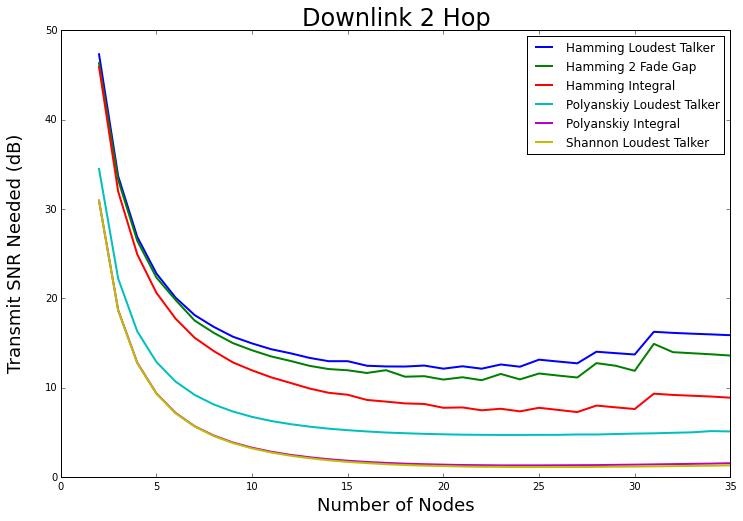

In [45]:
figure(figsize=(12, 8))
plot(user_range, hsrs_lt, lw=2.0, label='Hamming Loudest Talker')
plot(user_range, hsrs_fadegap[:,1], lw=2.0, label='Hamming 2 Fade Gap')
plot(user_range, hsrs_lti, lw=2.0, label='Hamming Integral')
plot(user_range, polyup_lt, lw=2.0, label='Polyanskiy Loudest Talker')
plot(user_range, poly_lti, lw=2.0, label='Polyanskiy Integral')
plot(user_range, shannon_lt, lw=2.0, label='Shannon Loudest Talker')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Downlink 2 Hop', fontsize=24)
savefig('downlink_2hop.pdf', bbox='tight')

In [47]:
print "Hamming Loudest Talker (No Integral, Threshold)"
print repr(hsrs_lt)
print "\n"

print "Hamming 2 Fade Gap"
print repr(hsrs_fadegap[:,1])
print "\n"

print "Hamming Integral"
print repr(hsrs_lti)
print "\n"

print "Polyanskiy Loudest Talker"
print repr(polyup_lt)
print "\n"

print "Polyanskiy Integral"
print repr(poly_lti)
print "\n"

print "Shannon Loudest Talker"
print repr(shannon_lt)

Hamming Loudest Talker (No Integral, Threshold)
array([ 47.33,  33.68,  26.86,  22.77,  20.07,  18.11,  16.79,  15.69,
        14.94,  14.29,  13.84,  13.32,  12.95,  12.95,  12.44,  12.36,
        12.35,  12.46,  12.11,  12.38,  12.11,  12.58,  12.33,  13.12,
        12.91,  12.71,  14.01,  13.85,  13.7 ,  16.24,  16.12,  16.03,
        15.95,  15.86])


Hamming 2 Fade Gap
array([ 46.33,  33.25,  26.43,  22.32,  19.81,  17.5 ,  16.12,  14.97,
        14.17,  13.48,  12.98,  12.43,  12.07,  11.93,  11.63,  11.94,
        11.21,  11.27,  10.89,  11.15,  10.82,  11.52,  10.91,  11.57,
        11.34,  11.12,  12.73,  12.44,  11.87,  14.89,  13.96,  13.84,
        13.72,  13.58])


Hamming Integral
array([ 45.91,  31.96,  24.91,  20.61,  17.72,  15.57,  14.08,  12.81,
        11.92,  11.14,  10.52,   9.89,   9.41,   9.19,   8.61,   8.42,
         8.22,   8.16,   7.73,   7.77,   7.45,   7.62,   7.33,   7.73,
         7.49,   7.25,   7.98,   7.78,   7.59,   9.31,   9.17,   9.08,
         8.9